### 0.UPLOAD LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import datetime
import joblib
import json

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer, make_column_selector

import warnings
warnings.filterwarnings('ignore')

### 1. UPLOAD DATA

In [3]:
data_sessions = pd.read_csv('/kaggle/input/sber-data/ga_sessions.csv', low_memory=False)
data_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
data_sessions.shape

(1860042, 18)

In [5]:
data_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [6]:
data_hits = pd.read_csv('/kaggle/input/sber-data/ga_hits.csv')
data_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [7]:
data_hits.shape

(15726470, 11)

In [8]:
data_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


### 2. DATA PREPARATION. Произвести очистку данных (удалить дубликаты, обработать пропуски: заполнить пропущенные значения, удалить пустые строки или столбцы)

#### 2.1 

In [9]:
data_sessions['client_id'].value_counts()[data_sessions['client_id'].value_counts() > 1]

client_id
1750498477.1629450062    462
130918396.1628014141     334
1266574870.1623140118    309
736859557.1619557452     306
1894772482.1621860860    276
                        ... 
210882936.1633330341       2
300392041.1634449322       2
1935147758.1637001338      2
2108622665.1632607293      2
391448234.1634022355       2
Name: count, Length: 232258, dtype: int64

In [10]:
data_sessions['session_id'].value_counts()[data_sessions['session_id'].value_counts() > 1]

Series([], Name: count, dtype: int64)

In [11]:
data_hits['session_id'].value_counts()[data_hits['session_id'].value_counts() > 1]

session_id
5442565791571325612.1632449195.1632449195    768
6568868914238486437.1632270313.1632270313    678
5959671972744778783.1632490527.1632490600    548
7452598043578978502.1632358598.1632358598    514
3070792010704358528.1629752408.1629752408    498
                                            ... 
6040477259820425684.1634460116.1634460116      2
5083561853390425921.1628442433.1628442433      2
4592116637220167765.1621847139.1621847139      2
255808180762627974.1627312005.1627312005       2
5653712770448456158.1621850590.1621850719      2
Name: count, Length: 1197367, dtype: int64

In [12]:
# формируем переменную и упаковываем в неё целевые действия из event_action

target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
                  'sub_open_dialog_click', 'sub_custom_question_submit_click',
                  'sub_call_number_click', 'sub_callback_submit_click', 
                  'sub_submit_success', 'sub_car_request_submit_click'
                 ]

In [13]:
# создаем столбец в data_hits, куда заносим 0 или 1 в зависимости от наличия цд

data_hits['is_target_action'] = data_hits['event_action'].apply(lambda x: 1 if x in target_actions else 0)

In [14]:
data_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,is_target_action
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN,0
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN,0
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN,0


#### 2.2

In [15]:
data_hits['is_target_action'].value_counts()

is_target_action
0    15621562
1      104908
Name: count, dtype: int64

In [16]:
df_merged = pd.merge(left=data_sessions, right=data_hits.groupby('session_id')['is_target_action'].max(), on='session_id', how='inner')

In [17]:
df_merged.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [18]:
df_merged['client_id'].value_counts()[df_merged['client_id'].value_counts() > 1]

client_id
1750498477.1629450062    449
1266574870.1623140118    303
736859557.1619557452     301
1894772482.1621860860    270
1065181919.1631610625    256
                        ... 
319554474.1636501332       2
1123592619.1637127628      2
346191960.1628075807       2
692198862.1631261863       2
1958713873.1633442631      2
Name: count, Length: 210072, dtype: int64

In [19]:
df_merged['session_id'].value_counts()[df_merged['session_id'].value_counts() > 1]

Series([], Name: count, dtype: int64)

In [20]:
df_merged = df_merged.drop_duplicates(subset=['client_id'])

In [21]:
df_merged['is_target_action'].value_counts()

# нам интересны значения только значения с единицей - цд совершено

is_target_action
0    1287813
1      32891
Name: count, dtype: int64

In [22]:
del data_hits
del data_sessions

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320704 entries, 0 to 1732265
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   session_id                1320704 non-null  object
 1   client_id                 1320704 non-null  object
 2   visit_date                1320704 non-null  object
 3   visit_time                1320704 non-null  object
 4   visit_number              1320704 non-null  int64 
 5   utm_source                1320696 non-null  object
 6   utm_medium                1320704 non-null  object
 7   utm_campaign              1226950 non-null  object
 8   utm_adcontent             1144510 non-null  object
 9   utm_keyword               561288 non-null   object
 10  device_category           1320704 non-null  object
 11  device_os                 567102 non-null   object
 12  device_brand              1079513 non-null  object
 13  device_model              12558 non-null    obj

#### 2.3 

In [24]:
# проверяем пропущенные значения

missing_values = ((df_merged.isna().sum() / len(df_merged)) * 100).sort_values(ascending=False)
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

device_model     99.049143
utm_keyword      57.500848
device_os        57.060628
device_brand     18.262306
utm_adcontent    13.340915
utm_campaign      7.098790
utm_source        0.000606
dtype: float64


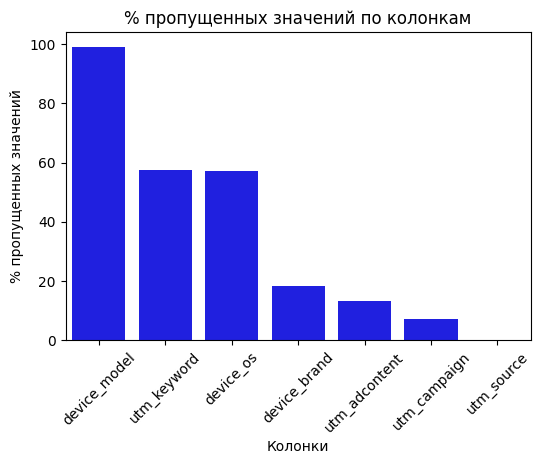

In [25]:
missing_df = pd.DataFrame({'column': missing_columns.index,'missing_percentage': missing_columns.values})
plt.figure(figsize=(6, 4))
sns.barplot(x='column', y='missing_percentage', data=missing_df, color='blue')
plt.title('% пропущенных значений по колонкам')
plt.xlabel('Колонки')
plt.ylabel('% пропущенных значений')
plt.xticks(rotation=45)
plt.show()

In [26]:
# ранее оставлял данные из ga_hits и проверял зависимость типа события и порядкового номера, 
# но ничего полезного тут не нашлось; лучше объединить датасеты по is_target_action и не брать 
# больше данных из "будущего";

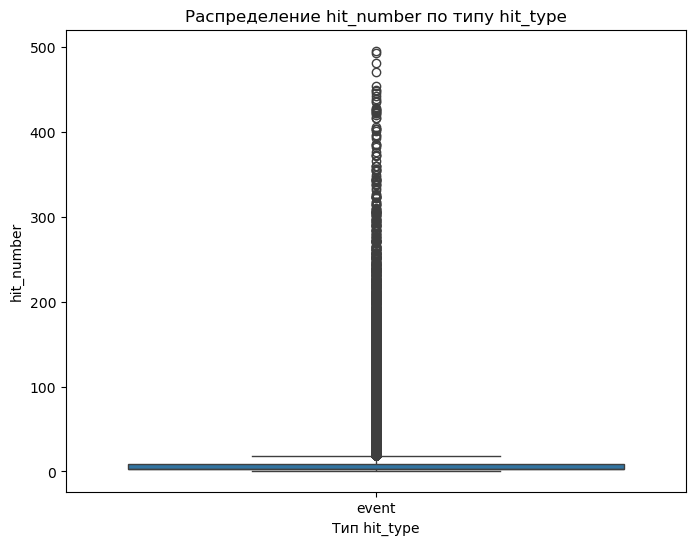

In [127]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='hit_type', y='hit_number', data=df_merged)
plt.title('Распределение hit_number по типу hit_type')
plt.xlabel('Тип hit_type')
plt.ylabel('hit_number')
plt.show()

In [27]:
# дропаем айдишки и device_model, состоит почти на 100 из NaN
df_merged.drop(columns=[
    'client_id', 
    'session_id',
    'device_model',
    'visit_number' 
], axis=1, inplace=True)

In [28]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320704 entries, 0 to 1732265
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   visit_date                1320704 non-null  object
 1   visit_time                1320704 non-null  object
 2   utm_source                1320696 non-null  object
 3   utm_medium                1320704 non-null  object
 4   utm_campaign              1226950 non-null  object
 5   utm_adcontent             1144510 non-null  object
 6   utm_keyword               561288 non-null   object
 7   device_category           1320704 non-null  object
 8   device_os                 567102 non-null   object
 9   device_brand              1079513 non-null  object
 10  device_screen_resolution  1320704 non-null  object
 11  device_browser            1320704 non-null  object
 12  geo_country               1320704 non-null  object
 13  geo_city                  1320704 non-null  obj

#### 2.4 обработка utm*

In [29]:
df_merged[df_merged.utm_source.isna()]

,visit_date,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
72375,2021-12-29,00:50:07,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,412x892,Chrome,Russia,Saint Petersburg,0
225810,2021-12-05,15:50:23,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,Chrome,Russia,Novosibirsk,0
926379,2021-11-22,06:18:34,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Yekaterinburg,0
1044246,2021-11-15,16:40:43,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,YaBrowser,Russia,Moscow,0
1087092,2021-12-05,11:19:20,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,360x800,Chrome,Russia,Moscow,0
1119976,2021-12-05,19:05:07,NaN,web_polka,cccMlyVfjXspfaCSrMsO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,360x800,Chrome,Russia,Moscow,0
1517221,2021-11-21,15:22:42,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,Chrome,Russia,Sochi,0
1650273,2021-11-13,15:34:23,NaN,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Yuzhno-Sakhalinsk,0


In [30]:
df_merged.utm_source.value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    489550
fDLlAcSmythWSCVMvqvL    216177
MvfHsxITijuriZxsqZqt    148849
kjsLglQLzykiRbcDiGcD    115430
BHcvLfOaCWvWTykYqHVe     74313
                         ...  
tjKUGseGMhkLEzdCqBRx         1
JdKLSdewxFqMMgKKiXBO         1
RPdScaVSDDKvfbqPGRVe         1
FArFiZMprRBKpQtJYEPL         1
hkvDVxqLOzGjGaoNiNzN         1
Name: count, Length: 205, dtype: int64

In [31]:
df_merged.utm_source = df_merged.utm_source.fillna(df_merged.utm_source.mode().loc[0])

In [32]:
df_merged.utm_source.isna().sum()

0

In [33]:
df_merged[df_merged.utm_campaign.isna()]

,visit_date,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
3,2021-05-29,05:00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
27,2021-12-12,07:09:36,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow,0
46,2021-05-30,07:00:00,kjsLglQLzykiRbcDiGcD,cpc,NaN,XKsYZiUFcdkUXQpoLKyS,NaN,mobile,NaN,Huawei,360x780,Opera,Russia,Saint Petersburg,0
47,2021-10-17,21:00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Samsung,339x716,Chrome,Russia,Reutov,0
76,2021-06-21,22:00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,desktop,NaN,NaN,834x1112,Safari,Russia,Domodedovo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732187,2021-11-30,17:28:07,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,nSReTmyFtbSjlPrTKoaX,mobile,Android,Xiaomi,393x851,Chrome,Russia,Moscow,0
1732204,2021-12-06,18:23:41,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,JajANoFxoqXfKRNBUhzx,mobile,iOS,Apple,414x896,Safari,Russia,Moscow,0
1732209,2021-08-28,19:00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x873,YaBrowser,Russia,Moscow,0
1732243,2021-07-15,15:00:00,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,NaN,desktop,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,0


In [34]:
df_merged.utm_campaign.value_counts(dropna=False)

utm_campaign
LEoPHuyFvzoNfnzGgfcd    284823
LTuZkdKfxRGVceoWkVyg    278886
FTjNLDyTrXaWYgZymFkV    206612
gecBYcKZCPMcVYdSSzKP    118705
NaN                      93754
                         ...  
zFCiMWkbbAhTflrlLWnz         1
zXjuoqEaPElBnwpSHMpx         1
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 369, dtype: int64

In [35]:
df_merged['utm_campaign'] = df_merged['utm_campaign'].fillna(df_merged['utm_campaign'].mode().loc[0])

In [36]:
print(df_merged['utm_campaign'].isna().sum())

0


In [38]:
df_merged[df_merged.utm_adcontent.isna()]

,visit_date,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
27,2021-12-12,07:09:36,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,NaN,okTXSMadDkjvntEHzIjp,mobile,Android,Samsung,385x854,Chrome,Russia,Moscow,0
37,2021-12-09,08:48:05,kjsLglQLzykiRbcDiGcD,cpc,LwJZxKuWmvOhPsaCeRjG,NaN,cdPAGAvKeBGoqAkQBuGR,mobile,iOS,Apple,375x812,Safari,Russia,Moscow,0
47,2021-10-17,21:00:00,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,NaN,NaN,mobile,NaN,Samsung,339x716,Chrome,Russia,Reutov,0
49,2021-06-18,11:00:00,QxAxdyPLuQMEcrdZWdWb,cpc,PXQWdUxeUoXfoKzTBGpY,NaN,NaN,mobile,NaN,Apple,390x844,Safari (in-app),Russia,Saint Petersburg,0
76,2021-06-21,22:00:00,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,NaN,NaN,desktop,NaN,NaN,834x1112,Safari,Russia,Domodedovo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732232,2021-10-24,19:04:52,kjsLglQLzykiRbcDiGcD,cpc,bJJuEXRheRIxXEaYIXqM,NaN,KCcEkEaKEtUilBVMoCAi,mobile,Android,Xiaomi,375x833,Chrome,Russia,Saint Petersburg,0
1732243,2021-07-15,15:00:00,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,NaN,NaN,desktop,NaN,NaN,1920x1080,YaBrowser,Russia,Moscow,0
1732256,2021-11-24,07:58:34,kjsLglQLzykiRbcDiGcD,cpc,RoDitORHdzGfGhNCyEMy,NaN,jPLfhIDoTujxnCRtjIfc,mobile,iOS,Apple,428x926,Safari,Russia,Moscow,0
1732260,2021-06-28,17:00:00,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,NaN,NaN,mobile,NaN,Samsung,320x676,Chrome,Russia,Naro-Fominsk,0


In [39]:
df_merged.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    717661
NaN                     176194
vCIpmpaGBnIQhyYNkXqp    159266
xhoenQgDQsgfEPYNPwKO     87617
PkybGvWbaqORmxjNunqZ     50021
                         ...  
mxvgMizBAnQXeqzHjTwa         1
fiImkyBmzQSeAeQEVCDZ         1
uUDFLZnWKzkthhRGUTvb         1
hShiaOumDHIRoHzTdJhP         1
FOpwpdsyixiqHvfVmkRD         1
Name: count, Length: 261, dtype: int64

In [40]:
df_merged.loc[:, 'utm_adcontent'] = df_merged['utm_adcontent'].fillna(df_merged['utm_adcontent'].mode().iloc[0])

In [41]:
df_merged.utm_adcontent.isna().sum()

0

In [42]:
df_merged[df_merged.utm_keyword.isna()]

,visit_date,visit_time,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,is_target_action
3,2021-05-29,05:00:00,kjsLglQLzykiRbcDiGcD,cpc,LEoPHuyFvzoNfnzGgfcd,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
5,2021-05-31,12:00:00,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,375x812,Safari,Russia,Saint Petersburg,0
7,2021-07-12,19:00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x640,Chrome,Russia,Saint Petersburg,0
9,2021-06-27,16:00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x915,Chrome,Russia,Moscow,0
11,2021-08-13,22:00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732255,2021-09-17,14:00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Xiaomi,393x851,Chrome,Russia,Saint Petersburg,0
1732257,2021-08-25,20:00:00,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,360x800,Android Webview,Russia,Saint Petersburg,1
1732259,2021-08-29,14:00:00,ISrKoXQCxqqYvAZICvjs,blogger_stories,zfwIehuEfWYdYrEZgRLo,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,414x896,Safari,Russia,Zheleznodorozhny,0
1732260,2021-06-28,17:00:00,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,320x676,Chrome,Russia,Naro-Fominsk,0


In [43]:
df_merged.utm_keyword.value_counts(dropna=False)

utm_keyword
NaN                     759416
puhZPIYqKXeFPaUviSjo    388986
aXQzDWsJuGXeBXexNHjc     16410
pHqgLcdBQPSLcrTpLkdr     10487
IGUCNvHlhfHpROGclCit      5979
                         ...  
WJUKqfeOrjXIOHjgcgdR         1
VeohqbbMxrVDBVhmKknr         1
YbcOQBSJMCcNKwwhwUZt         1
XsuVVTgiDIxZtndPjvDm         1
fcXWTQaKfxbkBkBnzLhK         1
Name: count, Length: 1111, dtype: int64

In [44]:
# 759к пропусков - оч много, лучше дропнуть
df_merged = df_merged[df_merged.utm_keyword.notna()]

In [45]:
df_merged['utm_keyword'].isna().sum()

0

In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561288 entries, 0 to 1732265
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   visit_date                561288 non-null  object
 1   visit_time                561288 non-null  object
 2   utm_source                561288 non-null  object
 3   utm_medium                561288 non-null  object
 4   utm_campaign              561288 non-null  object
 5   utm_adcontent             561288 non-null  object
 6   utm_keyword               561288 non-null  object
 7   device_category           561288 non-null  object
 8   device_os                 561288 non-null  object
 9   device_brand              487509 non-null  object
 10  device_screen_resolution  561288 non-null  object
 11  device_browser            561288 non-null  object
 12  geo_country               561288 non-null  object
 13  geo_city                  561288 non-null  object
 14  is_targe

In [47]:
missing_values = ((df_merged.isna().sum() / len(df_merged)) * 100).sort_values(ascending=False)
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

device_brand    13.144589
dtype: float64


#### 2.5 обработка visit_date, visit_time to date -> hour, dayofweek, is_weekend

In [48]:
df_merged.loc[:, "visit_datetime"] = pd.to_datetime(df_merged["visit_date"] + " " + df_merged["visit_time"])
df_merged.drop(['visit_date', 'visit_time'], axis=1, inplace=True)

df_merged["hour"] = df_merged["visit_datetime"].dt.hour
df_merged["dayofweek"] = df_merged["visit_datetime"].dt.dayofweek
df_merged["is_weekend"] = (df_merged["dayofweek"] >= 5).astype(int)
df_merged.drop(['visit_datetime'], axis=1, inplace=True)

#### 2.6 обработка пропусков и данных device*

In [49]:
df_merged['device_os'].value_counts(dropna=False)

device_os
Android          349310
iOS              138163
Windows           55181
Macintosh         14649
Linux              3601
(not set)           296
Chrome OS            58
BlackBerry           16
Tizen                 6
Firefox OS            2
Nokia                 2
Samsung               2
Windows Phone         2
Name: count, dtype: int64

In [50]:
df_merged['device_brand'].value_counts(dropna=False)

device_brand
Apple           138159
Samsung         124564
Xiaomi          104765
NaN              73779
Huawei           69135
                 ...  
MXQ                  1
China Mobile         1
Corn                 1
Smarteo              1
Guophone             1
Name: count, Length: 159, dtype: int64

In [51]:
df_merged['device_browser'].value_counts(dropna=False)

device_browser
Chrome                              347381
Safari                              129275
YaBrowser                            33006
Samsung Internet                     16282
Android Webview                      11896
Safari (in-app)                      10003
Opera                                 4465
Edge                                  4321
Firefox                               4005
Mozilla Compatible Agent               275
UC Browser                             242
Android Runtime                         34
MRCHROME                                16
Puffin                                  12
Mozilla                                  9
Internet Explorer                        8
Opera Mini                               7
helloworld                               6
Maxthon                                  6
Android Browser                          6
Instagram 212.0.0.38.119 Android         6
Instagram 213.0.0.29.120 Android         4
Coc Coc                                

In [52]:
df_merged.loc[df_merged['device_brand'] == 'Apple', 'device_os'] = 'iOS'
df_merged['device_brand'] = df_merged['device_brand'].fillna('Android') # NaN заполним Android

df_merged.loc[df_merged['device_browser'].isin(['Edge', 'Internet Explorer']), 'device_os'] = 'Windows'
df_merged['device_browser'] = df_merged['device_browser'].str.split().str[0] # оставляем только первое слово

df_merged.loc[df_merged['device_os'].isnull(), 'device_os'] = 'Android' # NaN заполним Android

In [53]:
# разделим device_screen_resolution на device_height и device_width

df_merged[['device_width', 'device_height']] = df_merged['device_screen_resolution'].str.split('x', expand=True).astype(int)
df_merged.drop(columns=['device_screen_resolution'], inplace=True)

In [54]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561288 entries, 0 to 1732265
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   utm_source        561288 non-null  object
 1   utm_medium        561288 non-null  object
 2   utm_campaign      561288 non-null  object
 3   utm_adcontent     561288 non-null  object
 4   utm_keyword       561288 non-null  object
 5   device_category   561288 non-null  object
 6   device_os         561288 non-null  object
 7   device_brand      561288 non-null  object
 8   device_browser    561288 non-null  object
 9   geo_country       561288 non-null  object
 10  geo_city          561288 non-null  object
 11  is_target_action  561288 non-null  int64 
 12  hour              561288 non-null  int32 
 13  dayofweek         561288 non-null  int32 
 14  is_weekend        561288 non-null  int64 
 15  device_width      561288 non-null  int64 
 16  device_height     561288 non-null  int64 


In [55]:
missing_values = ((df_merged.isna().sum() / len(df_merged)) * 100).sort_values(ascending=False)
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: float64)


In [56]:
#df_merged['hit_time'] = df_merged['hit_time'].fillna(df_merged['hit_time'].median())
#df_merged['hit_referer'] = df_merged['hit_referer'].fillna(df_merged['hit_referer'].mode().iloc[0])

In [57]:
# обрезаем название podpiska, sberauto и тд

#df_merged['hit_page_path'] = df_merged['hit_page_path'].apply(lambda x: x.split('.')[0])
#df_merged['hit_page_path'].value_counts()

In [58]:
print('Amount of filled objects:', len(df_merged.dropna()))
print('Percent of filled objects:', round(len(df_merged.dropna()) / len(df_merged) * 100, 2))

Amount of filled objects: 561288
Percent of filled objects: 100.0


In [59]:
conversion_rate = df_merged['is_target_action'].mean()
print(f"Conversion rate: {conversion_rate:.2%}")

Conversion rate: 1.98%


### 3. FEATURE ENGINEERING 

#### 3.1 добаляем фичи; промежуточные инсайты; сейвим файл для кодирования

In [60]:
# для ускорения работы с данными изменим формат

df_merged['device_os'] = df_merged['device_os'].astype('category')
df_merged['device_category'] = df_merged['device_category'].astype('category')
df_merged['device_browser'] = df_merged['device_browser'].astype('category')

In [61]:
# создадим is_organic, чтобы пронаблюдать тип привлечения юзеров; по тз органикой считаются след категории:

organic_utms_medium = ['organic', 'referral', '(none)']
df_merged['is_organic'] = df_merged['utm_medium'].isin(organic_utms_medium)
df_merged['is_organic'] = df_merged['is_organic'].astype(int)

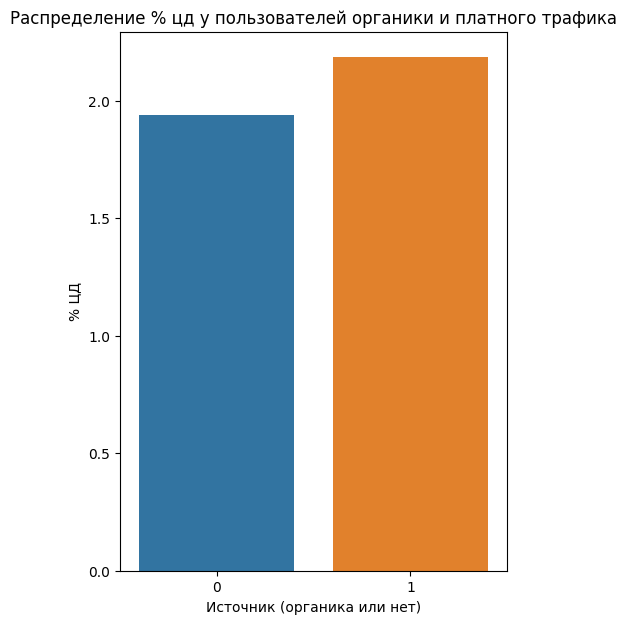

In [62]:
# добавим пару графиков визуализации зависимостей

plt.figure(figsize=(5, 7))
agg_data = df_merged.groupby('is_organic')['is_target_action'].mean() * 100
sns.barplot(x=agg_data.index, y=agg_data.values)
plt.title('Распределение % цд у пользователей органики и платного трафика')
plt.xlabel('Источник (органика или нет)')
plt.ylabel('% ЦД')
plt.show()

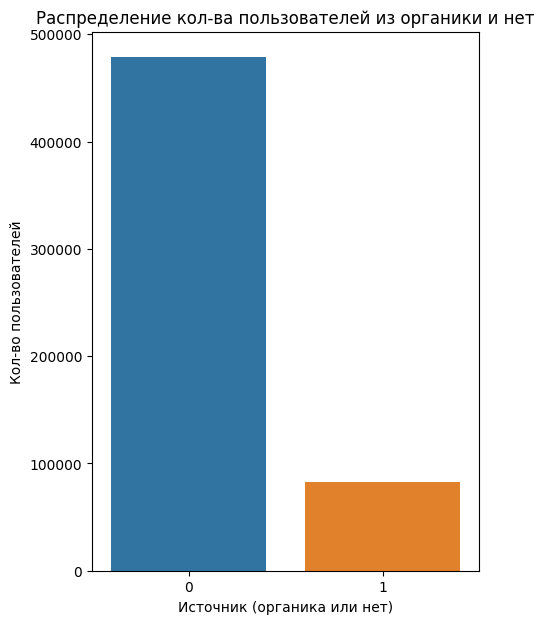

In [63]:
plt.figure(figsize=(5, 7))
sns.countplot(x='is_organic', data=df_merged)
plt.title('Распределение кол-ва пользователей из органики и нет')
plt.xlabel('Источник (органика или нет)')
plt.ylabel('Кол-во пользователей')
plt.show()

In [64]:
# создаем переменную social_media_utms и кладем в неё всю рекламу из соц сетей

social_media_utms = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                     'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                     'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [65]:
# создаем from_social, добавляем в дс

df_merged['from_social'] =  df_merged['utm_source'].isin(social_media_utms)
df_merged['from_social'] = df_merged['from_social'].astype(int)

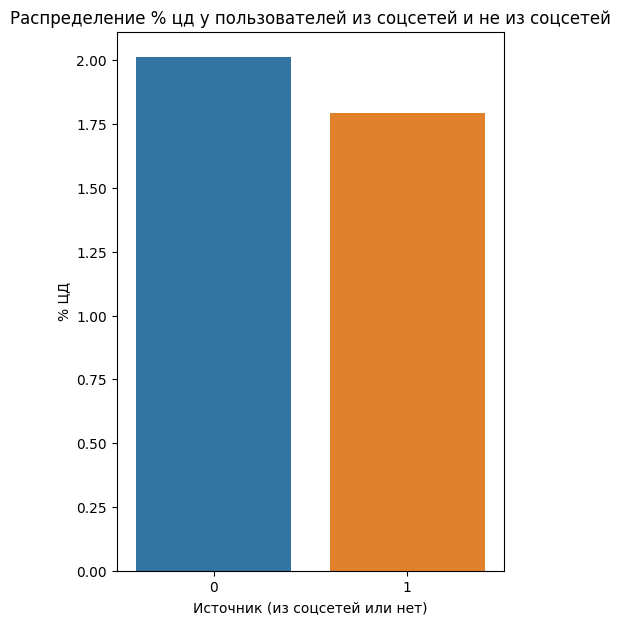

In [66]:
# строим график распределения цд по соцсетям или нет

plt.figure(figsize=(5, 7))
agg_data = df_merged.groupby('from_social')['is_target_action'].mean() * 100
sns.barplot(x=agg_data.index, y=agg_data.values)
plt.title('Распределение % цд у пользователей из соцсетей и не из соцсетей')
plt.xlabel('Источник (из соцсетей или нет)')
plt.ylabel('% ЦД')
plt.show()

In [67]:
# пользователи с органики чаще совершают цд+
# пользователи из соц сетей реже совершают цд+

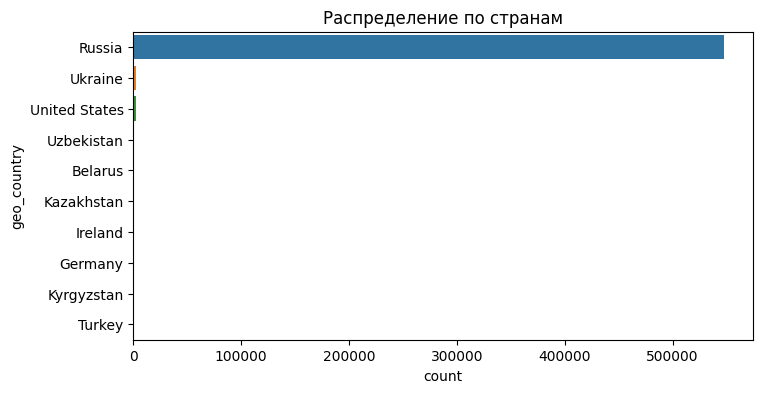

In [68]:
# смотрим на распределение юзеров по странам

plt.figure(figsize=(8, 4))
sns.countplot(y='geo_country', data=df_merged, order=df_merged['geo_country'].value_counts().head(10).index)
plt.title('Распределение по странам')
plt.show()

In [69]:
# и по городам

city_counts = df_merged['geo_city'].value_counts()
city_counts

geo_city
Moscow              209540
Saint Petersburg     81254
(not set)            18552
Yekaterinburg        14989
Krasnodar            14177
                     ...  
Schwechat                1
Erfurt                   1
Stryi                    1
Faridabad                1
Palatka                  1
Name: count, Length: 1508, dtype: int64

In [70]:
# так как основной поток из России, создаем колонку is_russia и добавляем в дс

df_merged['is_russia'] = (df_merged['geo_country'] == 'Russia').astype(int)
df_merged.drop(columns=['geo_country'], inplace=True)

In [71]:
# основной поток из Москвы и Питера, создаем колонку is_moscow_spb и добавляем в дс

df_merged['is_moscow_spb'] = df_merged['geo_city'].apply(lambda x: 1 if x in ['Moscow', 'Saint Petersburg'] else 0)
df_merged.drop(columns=['geo_city'], inplace=True)

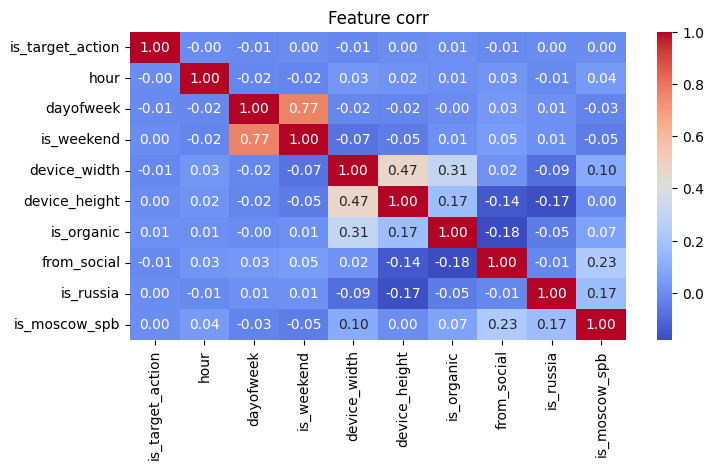

In [72]:
# еще посмотрим на матрицу корреляции числовых признаков; видим, что is_target_action практически
# не коррелирует с другими признаками :(

correlation_matrix = df_merged.select_dtypes(include=['int']).corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature corr")
plt.show()

In [73]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561288 entries, 0 to 1732265
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   utm_source        561288 non-null  object  
 1   utm_medium        561288 non-null  object  
 2   utm_campaign      561288 non-null  object  
 3   utm_adcontent     561288 non-null  object  
 4   utm_keyword       561288 non-null  object  
 5   device_category   561288 non-null  category
 6   device_os         561288 non-null  category
 7   device_brand      561288 non-null  object  
 8   device_browser    561288 non-null  category
 9   is_target_action  561288 non-null  int64   
 10  hour              561288 non-null  int32   
 11  dayofweek         561288 non-null  int32   
 12  is_weekend        561288 non-null  int64   
 13  device_width      561288 non-null  int64   
 14  device_height     561288 non-null  int64   
 15  is_organic        561288 non-null  int64   
 16  from_s

In [74]:
df_merged.nunique()

utm_source           134
utm_medium            38
utm_campaign         246
utm_adcontent        143
utm_keyword         1110
device_category        3
device_os             13
device_brand         159
device_browser        27
is_target_action       2
hour                  24
dayofweek              7
is_weekend             2
device_width         819
device_height        944
is_organic             2
from_social            2
is_russia              2
is_moscow_spb          2
dtype: int64

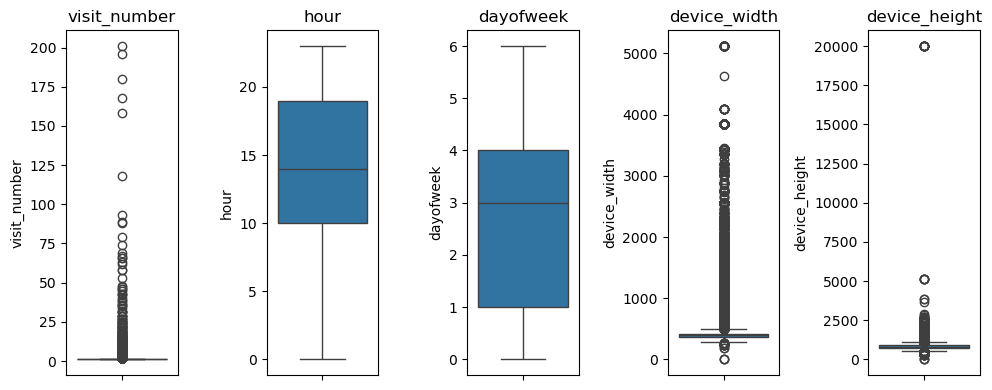

In [161]:
# пробовал еще тестово пообрезать хвосты тут, но картину особо не изменило

num_cols = ['visit_number', 'hour', 'dayofweek', 'device_width', 'device_height']

plt.figure(figsize=(10, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df_merged[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [71]:
df_merged

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,is_target_action,hour,dayofweek,is_weekend,device_width,device_height,is_organic,from_social,is_russia,is_moscow_spb
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,0,14,2,0,360,720,0,0,1,0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung,0,8,6,1,385,854,0,1,1,1
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,0,2,1,0,360,720,0,0,1,0
6,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,YaBrowser,0,8,3,0,602,1029,0,0,1,1
8,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,0,16,4,0,390,844,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732258,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Chrome,0,9,5,1,384,854,0,0,1,0
1732261,BHcvLfOaCWvWTykYqHVe,cpc,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,VlqBmecIOXWjCWUmQkLd,desktop,Windows,Android,Chrome,0,10,2,0,1920,1080,0,0,1,1
1732263,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari,0,15,0,0,375,667,1,0,1,1
1732264,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,Chrome,0,15,0,0,393,851,0,0,1,0


In [75]:
df_for_ohe_std = df_merged.copy()

In [165]:
df_for_ohe_std.to_csv('df_for_ohe_std.csv')

In [167]:
#df_for_ohe_std.to_parquet('/Users/romankostenko/PycharmProjects/sber_auto/model/data/df_for_ohe_std.parquet', engine='pyarrow')

In [76]:
del df_merged

#### 3.2 кодирование и стандартизация фич

In [77]:
# кодирование категориальных данных

In [78]:
df_for_ohe_std = pd.read_csv('/kaggle/input/sber-data/df_for_ohe_std.csv', index_col=0)

In [79]:
df_for_ohe_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561288 entries, 0 to 1732265
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   utm_source        561288 non-null  object
 1   utm_medium        561288 non-null  object
 2   utm_campaign      561288 non-null  object
 3   utm_adcontent     561288 non-null  object
 4   utm_keyword       561288 non-null  object
 5   device_category   561288 non-null  object
 6   device_os         561288 non-null  object
 7   device_brand      561288 non-null  object
 8   device_browser    561288 non-null  object
 9   is_target_action  561288 non-null  int64 
 10  hour              561288 non-null  int64 
 11  dayofweek         561288 non-null  int64 
 12  is_weekend        561288 non-null  int64 
 13  device_width      561288 non-null  int64 
 14  device_height     561288 non-null  int64 
 15  is_organic        561288 non-null  int64 
 16  from_social       561288 non-null  int64 


In [80]:
columns = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
           'utm_keyword', 'device_category', 'device_os', 'device_brand',
           'device_browser'
          ]
for column in columns:
    print(column, df_for_ohe_std[column].nunique())

utm_source 134
utm_medium 38
utm_campaign 246
utm_adcontent 143
utm_keyword 1110
device_category 3
device_os 13
device_brand 159
device_browser 27


In [81]:
df_for_ohe_std[columns] = df_for_ohe_std[columns].astype(str)

In [82]:
data_cat = df_for_ohe_std[columns].copy()

In [83]:
data_cat.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome
6,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,YaBrowser
8,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,Safari


In [84]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=150)
ohe

OneHotEncoder(handle_unknown='ignore', max_categories=150, sparse_output=False)

In [85]:
ohe_new = ohe.fit_transform(data_cat) 
ohe_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
ohe_new.shape

(561288, 808)

In [86]:
#ohe.get_feature_names_out()

In [87]:
ohe_df = pd.DataFrame(ohe_new, columns=ohe.get_feature_names_out(data_cat.columns), index=df_for_ohe_std.index)

In [88]:
df_for_ohe_std = pd.concat([df_for_ohe_std, ohe_df], axis=1)
df_for_ohe_std.drop(columns=data_cat.columns, inplace=True)
df_for_ohe_std.head()

,is_target_action,hour,dayofweek,is_weekend,device_width,device_height,is_organic,from_social,is_russia,is_moscow_spb,...,device_browser_Opera,device_browser_Puffin,device_browser_Safari,device_browser_Samsung,device_browser_SeaMonkey,device_browser_UC,device_browser_YaBrowser,device_browser_[FBAN,device_browser_com.zhiliaoapp.musically,device_browser_helloworld
0,0,14,2,0,360,720,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,8,6,1,385,854,0,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,1,0,360,720,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,8,3,0,602,1029,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0,16,4,0,390,844,0,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
joblib.dump(ohe, 'encoder.pkl')

['encoder.pkl']

In [90]:
ohe_loaded = joblib.load('/kaggle/input/sber-data/encoder.pkl')
ohe_loaded

OneHotEncoder(handle_unknown='ignore', max_categories=150, sparse_output=False)

In [91]:
# кодирование количественных переменных

In [92]:
data_var = df_for_ohe_std[['hour', 'dayofweek', 'device_width', 'device_height']].copy()
data_var

,hour,dayofweek,device_width,device_height
0,14,2,360,720
1,8,6,385,854
2,2,1,360,720
6,8,3,602,1029
8,16,4,390,844
...,...,...,...,...
1732258,9,5,384,854
1732261,10,2,1920,1080
1732263,15,0,375,667
1732264,15,0,393,851


In [93]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [94]:
std_scaled = std_scaler.fit_transform(data_var)
std_scaled

array([[ 0.04020264, -0.46791322, -0.44060471, -0.53586126],
       [-0.95084913,  1.58809176, -0.38735965,  0.18642656],
       [-1.9419009 , -0.98191447, -0.44060471, -0.53586126],
       ...,
       [ 0.20537793, -1.49591571, -0.40865768, -0.82154226],
       [ 0.20537793, -1.49591571, -0.37032123,  0.17025593],
       [ 0.86607911,  0.56008927,  1.7019766 , -0.27713129]])

In [95]:
std_scaled_df = pd.DataFrame(std_scaled, columns=data_var.columns)

In [96]:
df_for_ohe_std = pd.concat([df_for_ohe_std, std_scaled_df], axis=1)
df_for_ohe_std.drop(columns=['hour', 'dayofweek', 'device_width', 'device_height'], inplace=True)
df_for_ohe_std.head()

,is_target_action,is_weekend,is_organic,from_social,is_russia,is_moscow_spb,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_ArbfvYgWhqxkzywKqpQf,utm_source_AuJjYKxJakEqFnCmyFtz,utm_source_BAZCuyHZnaPrMGOMrcCQ,...,device_browser_Opera,device_browser_Puffin,device_browser_Safari,device_browser_Samsung,device_browser_SeaMonkey,device_browser_UC,device_browser_YaBrowser,device_browser_[FBAN,device_browser_com.zhiliaoapp.musically,device_browser_helloworld
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
joblib.dump(std_scaler, 'scaler.pkl')

['scaler.pkl']

In [98]:
std_scaler_loaded = joblib.load('/kaggle/input/sber-data/scaler.pkl')
std_scaler_loaded

StandardScaler()

In [99]:
df_for_ohe_std = df_for_ohe_std.dropna()

In [100]:
df_for_ohe_std.isna().sum()

is_target_action                           0
is_weekend                                 0
is_organic                                 0
from_social                                0
is_russia                                  0
                                          ..
device_browser_UC                          0
device_browser_YaBrowser                   0
device_browser_[FBAN                       0
device_browser_com.zhiliaoapp.musically    0
device_browser_helloworld                  0
Length: 814, dtype: int64

In [101]:
df_for_ohe_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561288 entries, 0 to 1732265
Columns: 814 entries, is_target_action to device_browser_helloworld
dtypes: float64(814)
memory usage: 3.4 GB


In [102]:
df_for_ohe_std.to_parquet('df_prepared.parquet', engine='pyarrow')

In [100]:
# piece of data for prediction example w 0/1

filtered_df = df_for_ohe_std[(df_for_ohe_std["is_weekend"] == 1) & (df_for_ohe_std["is_moscow_spb"] == 1)]
data_json = filtered_df.to_dict(orient="records")
with open("filtered_data.json", "w", encoding="utf-8") as f:
    json.dump(data_json, f, indent=4, ensure_ascii=False)

### 4. MODELING

In [103]:
df_prepared = pd.read_parquet('/kaggle/input/sber-data/df_prepared.parquet', engine='pyarrow')

In [104]:
df_prepared.head()

,is_target_action,is_weekend,is_organic,from_social,is_russia,is_moscow_spb,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_ArbfvYgWhqxkzywKqpQf,utm_source_AuJjYKxJakEqFnCmyFtz,utm_source_BAZCuyHZnaPrMGOMrcCQ,...,device_browser_Opera,device_browser_Puffin,device_browser_Safari,device_browser_Samsung,device_browser_SeaMonkey,device_browser_UC,device_browser_YaBrowser,device_browser_[FBAN,device_browser_com.zhiliaoapp.musically,device_browser_helloworld
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df_prepared['is_target_action'].value_counts()

is_target_action
0.0    179206
1.0      3576
Name: count, dtype: int64

In [106]:
x = df_prepared.drop(['is_target_action'], axis=1)
y = df_prepared['is_target_action']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### 4.1 LOGREG

In [107]:
clfs = []

In [108]:
parameters_logreg = {'C': [0.25, 0.5, 1, 2]}

logreg = LogisticRegression(solver='liblinear',
                            class_weight='balanced',
                            tol=1e-6,
                            random_state=42)

clf_logreg = GridSearchCV(logreg, parameters_logreg, cv=4, scoring='roc_auc', verbose=100)
clf_logreg.fit(x_train, y_train)
clfs.append(clf_logreg)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START C=0.25......................................................
[CV 1/4; 1/4] END .......................C=0.25;, score=0.634 total time=   5.8s
[CV 2/4; 1/4] START C=0.25......................................................
[CV 2/4; 1/4] END .......................C=0.25;, score=0.634 total time=   5.0s
[CV 3/4; 1/4] START C=0.25......................................................
[CV 3/4; 1/4] END .......................C=0.25;, score=0.623 total time=   4.1s
[CV 4/4; 1/4] START C=0.25......................................................
[CV 4/4; 1/4] END .......................C=0.25;, score=0.634 total time=   4.1s
[CV 1/4; 2/4] START C=0.5.......................................................
[CV 1/4; 2/4] END ........................C=0.5;, score=0.630 total time=   5.0s
[CV 2/4; 2/4] START C=0.5.......................................................
[CV 2/4; 2/4] END ........................C=0.5;,

In [109]:
clf_logreg.score(x_train, y_train)

0.676586947051356

In [110]:
roc_auc_score(y, clf_logreg.predict_proba(x)[:,1])

0.6673447166560543

In [111]:
pd.DataFrame(clf_logreg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.686183,0.685838,0.062396,0.009145,0.25,{'C': 0.25},0.634253,0.634141,0.623247,0.634038,0.631420,0.004719,1
1,4.948622,0.132330,0.061978,0.004877,0.5,{'C': 0.5},0.630360,0.632916,0.620829,0.631869,0.628993,0.004800,2
2,5.931172,0.028114,0.060596,0.001286,1,{'C': 1},0.628134,0.632329,0.619192,0.630352,0.627502,0.005022,3
3,7.244821,0.183044,0.060925,0.004252,2,{'C': 2},0.627180,0.631987,0.618518,0.629422,0.626777,0.005062,4


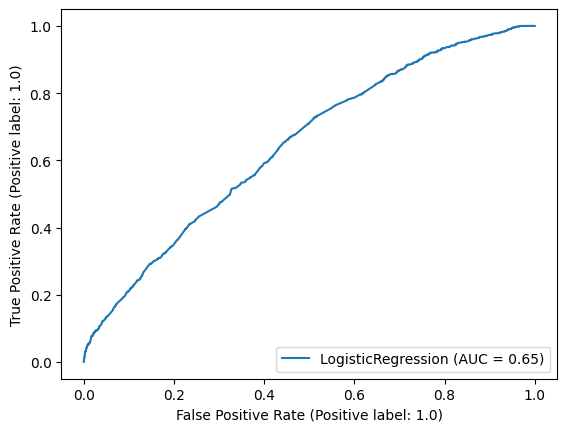

In [112]:
RocCurveDisplay.from_estimator(clf_logreg.best_estimator_, x_test, y_test)
plt.show();

#### 4.2 RANDOM FOREST

In [113]:
parameters_rf = {'min_samples_split': [2, 3, 4]}

rf = RandomForestClassifier(n_estimators=100,
                            max_features='sqrt',
                            min_samples_leaf=2,
                            bootstrap=False,
                            max_depth=100,
                            n_jobs=-1,
                            random_state=42)

clf_rf = GridSearchCV(rf, parameters_rf, cv=4, scoring='roc_auc', verbose=100)
clf_rf.fit(x_train, y_train)
clfs.append(clf_rf)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4; 1/3] START min_samples_split=2.........................................
[CV 1/4; 1/3] END ..........min_samples_split=2;, score=0.642 total time=  23.4s
[CV 2/4; 1/3] START min_samples_split=2.........................................
[CV 2/4; 1/3] END ..........min_samples_split=2;, score=0.639 total time=  21.7s
[CV 3/4; 1/3] START min_samples_split=2.........................................
[CV 3/4; 1/3] END ..........min_samples_split=2;, score=0.633 total time=  21.4s
[CV 4/4; 1/3] START min_samples_split=2.........................................
[CV 4/4; 1/3] END ..........min_samples_split=2;, score=0.654 total time=  21.0s
[CV 1/4; 2/3] START min_samples_split=3.........................................
[CV 1/4; 2/3] END ..........min_samples_split=3;, score=0.642 total time=  22.3s
[CV 2/4; 2/3] START min_samples_split=3.........................................
[CV 2/4; 2/3] END ..........min_samples_split=3;,

In [114]:
clf_rf.score(x_train, y_train)

0.7762720339650483

In [115]:
score = roc_auc_score(y, clf_rf.predict_proba(x)[:,1])
score

0.7383439324111796

In [116]:
pd.DataFrame(clf_rf.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,21.400036,0.922021,0.482050,0.015191,2,{'min_samples_split': 2},0.642031,0.638786,0.632708,0.653805,0.641833,0.00768,1
1,21.471141,0.307078,0.487441,0.033469,3,{'min_samples_split': 3},0.642031,0.638786,0.632708,0.653805,0.641833,0.00768,1
2,21.718670,0.209170,0.481278,0.016909,4,{'min_samples_split': 4},0.642031,0.638786,0.632708,0.653805,0.641833,0.00768,1


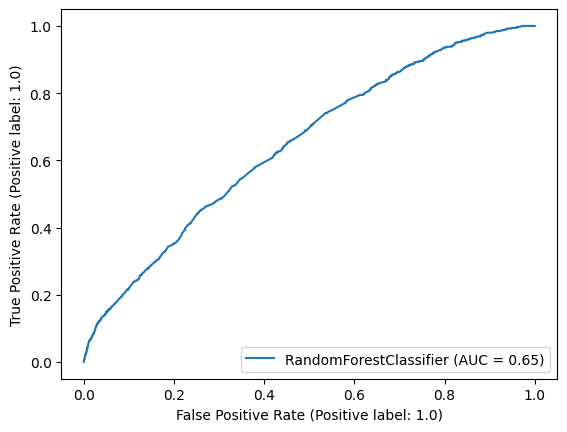

In [117]:
RocCurveDisplay.from_estimator(clf_rf.best_estimator_, x_test, y_test)
plt.show();

#### 4.3 MLP

In [118]:
parameters_mlp = {'hidden_layer_sizes': [(2, 2), (5, 2)]}

mlp = MLPClassifier(activation='identity',
                    solver='lbfgs',
                    alpha=0.0001,
                    tol=1e-3,
                    max_iter=1000,
                    random_state=12)

clf_mlp = GridSearchCV(mlp, parameters_mlp, cv=4, scoring='roc_auc', verbose=100)
clf_mlp.fit(x_train, y_train)
clfs.append(clf_mlp)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 1/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.630 total time=   3.0s
[CV 2/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 2/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.610 total time=   2.6s
[CV 3/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 3/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.608 total time=   2.9s
[CV 4/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 4/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.607 total time=   2.8s
[CV 1/4; 2/2] START hidden_layer_sizes=(5, 2)...................................
[CV 1/4; 2/2] END ....hidden_layer_sizes=(5, 2);, score=0.638 total time=   2.9s
[CV 2/4; 2/2] START hidden_layer_sizes=(5, 2)...................................
[CV 2/4; 2/2] END ....hidden_layer_sizes=(5, 2);, 

In [119]:
clf_mlp.score(x_train, y_train)

0.6314644764039496

In [120]:
roc_auc_score(y, clf_mlp.predict_proba(x)[:,1])

0.6296370591069366

In [121]:
pd.DataFrame(clf_mlp.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,2.684027,0.108582,0.089327,0.011165,"(5, 2)","{'hidden_layer_sizes': (5, 2)}",0.638415,0.623116,0.616169,0.627604,0.626326,0.008082,1
0,2.736644,0.125322,0.082159,0.006064,"(2, 2)","{'hidden_layer_sizes': (2, 2)}",0.630341,0.610388,0.607698,0.606654,0.613770,0.009664,2


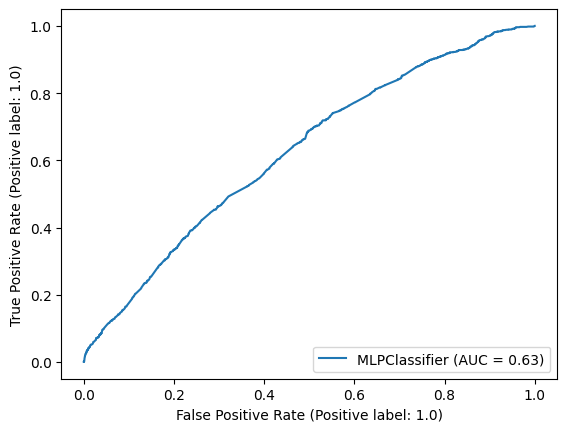

In [122]:
RocCurveDisplay.from_estimator(clf_mlp.best_estimator_, x_test, y_test)
plt.show();

### 5. RESULTS

In [123]:
clf_rf_full = clf_rf.best_estimator_
clf_rf_full

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_jobs=-1, random_state=42)

In [124]:
clf_rf_full.fit(x, y)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_jobs=-1, random_state=42)

In [125]:
clf_rf_full.score(x, y)

0.9804357102997013

In [126]:
roc_auc_score(y, clf_rf_full.predict_proba(x)[:,1])

0.762295134408576

In [127]:
model_filename = f'model_sber_auto.pkl'

In [128]:
with open (model_filename, 'wb') as file:
   dill.dump({
       'model': clf_rf_full,
       'metadata': {
       'name': 'sber target model',
           'author': 'Roman Kostenko',
           'version': 1,
           'date': datetime.datetime.now(),
           'type': type(clf_rf_full).__name__,
           'ROC_AUC': score
       }
   }, file)
print(f"{model_filename}, ROC_AUC: {score:.4f}")

model_sber_auto.pkl, ROC_AUC: 0.7383


In [129]:
### check model

In [130]:
with open('model_sber_auto.pkl', 'rb') as file:
    data = dill.load(file)

loaded_model = data['model']
metadata = data['metadata']

print("Model:", loaded_model)
print("Meta:", metadata)

sample_preds = loaded_model.predict_proba(x_test[:5])
print(sample_preds)

Model: RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_jobs=-1, random_state=42)
Meta: {'name': 'sber target model', 'author': 'Roman Kostenko', 'version': 1, 'date': datetime.datetime(2025, 9, 4, 13, 23, 17, 557005), 'type': 'RandomForestClassifier', 'ROC_AUC': 0.7383439324111796}
[[0.98278451 0.01721549]
 [0.97662014 0.02337986]
 [0.97695465 0.02304535]
 [0.98706374 0.01293626]
 [0.97792491 0.02207509]]
